**The following code need to be run twice time each for Malignant and Benign Separately. Depending on how many times data needs to be augmented the loop can be re run multiple times but with a different prefix so images may not overwrite**

#COLAB, Libraries and Paths defined
(uncomment/comment if colab used and change paths accordingly in next section)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Presets

In [ ]:
#params
test_percent = 0.2# @param {type: "slider", min:0.05, max:0.5, step:0.05}
batch_size = 32# @param {type: "slider", min:0, max:128 ,step:8}

#Paths
dataset_path = "/content/drive/MyDrive/data/comb_dt_splits/train"
save_dir = "/content/drive/MyDrive/data/comb_dt_splits/oneandhalf_aug_train/M"
#Set/toggle E or M in the path above

Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
import cv2
import tensorflow as tf
import pandas as pd

from tqdm import tqdm
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow
import gc

In [ ]:
DATADIR = dataset_path
FOLDERS = ["M"]       #Set/toggle E or M
CATEGORIES = ["M"]    #Set/toggle E or M in the path above
NUM_CLASSES = 1
IMG_SIZE = 224
category = ["M"]      #Set/toggle E or M in the path above

#Read Data to be augmented

Data read Funtion

In [ ]:

def read_data():
    images = []
    labels = []
    img_paths = []
    data = []

    for folder in (FOLDERS):                     # do B and M 
        path = os.path.join(DATADIR,folder)      # create path to B and M  
        #class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=B and 1=M
        class_num = 0
        for i,img_path in enumerate(tqdm(os.listdir(path))):            # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img_path))     # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size                
                img_paths.append(os.path.join(path,img_path))
                
                images.append(img_array)
                labels.append(class_num)
            except Exception as e:                                       # in the interest in keeping the output clean...
                pass

    images_raw = np.array(images) #for printing
    images = np.asarray(images).astype(np.float32)
    labels = np.array(labels)

    #return images,images_raw
    return images,labels

Data read Function call

In [ ]:
X_train = []
y_train = []
X_train , y_train = read_data()


100%|██████████| 2801/2801 [00:14<00:00, 191.93it/s]


Plot few of the pictures

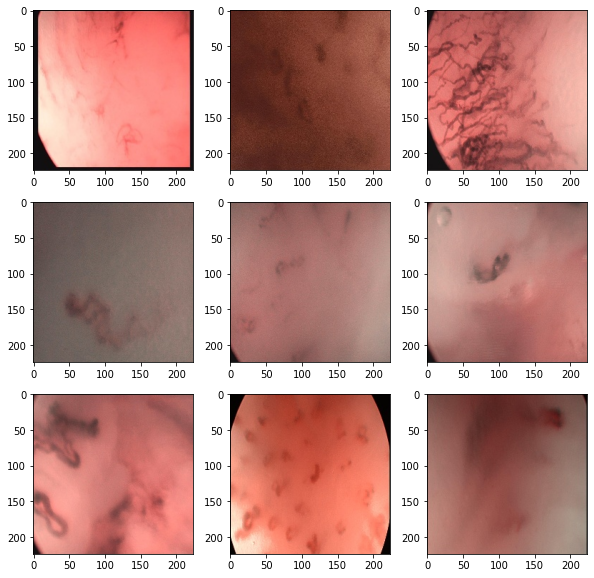

In [ ]:
plt.figure(figsize=(10, 10))
for i in range (9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(np.array(X_train[i]).astype('uint8'))  # graph it
plt.show()  # display!

#Augment using Image Data Generator and Saving augmented data

Use image data generator using geometric augmentation techinques randomly

In [ ]:

train_datagen = ImageDataGenerator(vertical_flip = True, horizontal_flip=True,
                                   rotation_range=90, brightness_range=[0.2,1.0],
                                   zoom_range=[0.5,1.0]
                         )


In [ ]:
prefix = "loop2_M_AUG"  ##change this everytime the code is re run for next augmentation otherwise images may overwrite

Warning: set batch size like total images /9 = batch size otherwise its indefinite loop


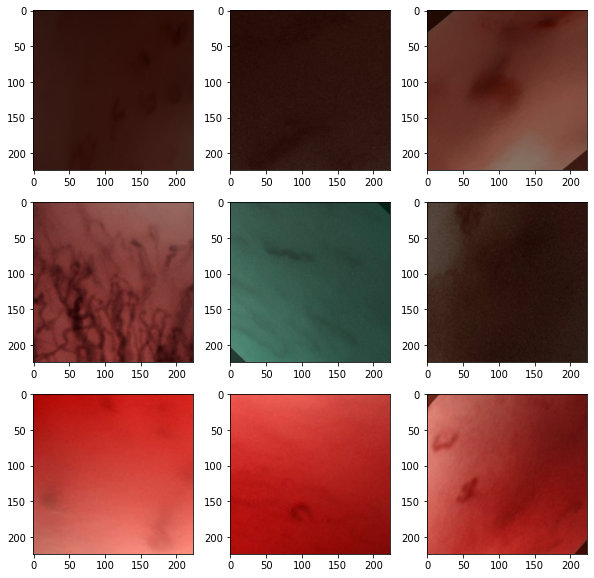

In [ ]:

# fit parameters from data

train_datagen.fit(X_train)

# configure batch size and retrieve one batch of images
#os.makedirs(save_dir) ## use this when the folder needs to be created



plt.figure(figsize=(10, 10))

it = train_datagen.flow(X_train,batch_size=311, save_to_dir= save_dir, save_prefix = prefix, save_format='jpg' )  # create a grid of 3x3 images
for i in range(0, 9):

  ##loading next Batch
  batch = it.next()      
  
  
  plt.subplot(330 + 1 + i)
  plt.imshow(batch[i].astype('uint8'))

# show the plot
plt.show()


#Self work

File Count in specified folder(Side Note)

In [ ]:

# folder path
dir_path = "/content/drive/MyDrive/data/comb_dt_splits/oneandhalf_aug_train/B"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 9113
